In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../data/winequality-red.csv")

A quick way to show pair-wise correlations among columns

In [5]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

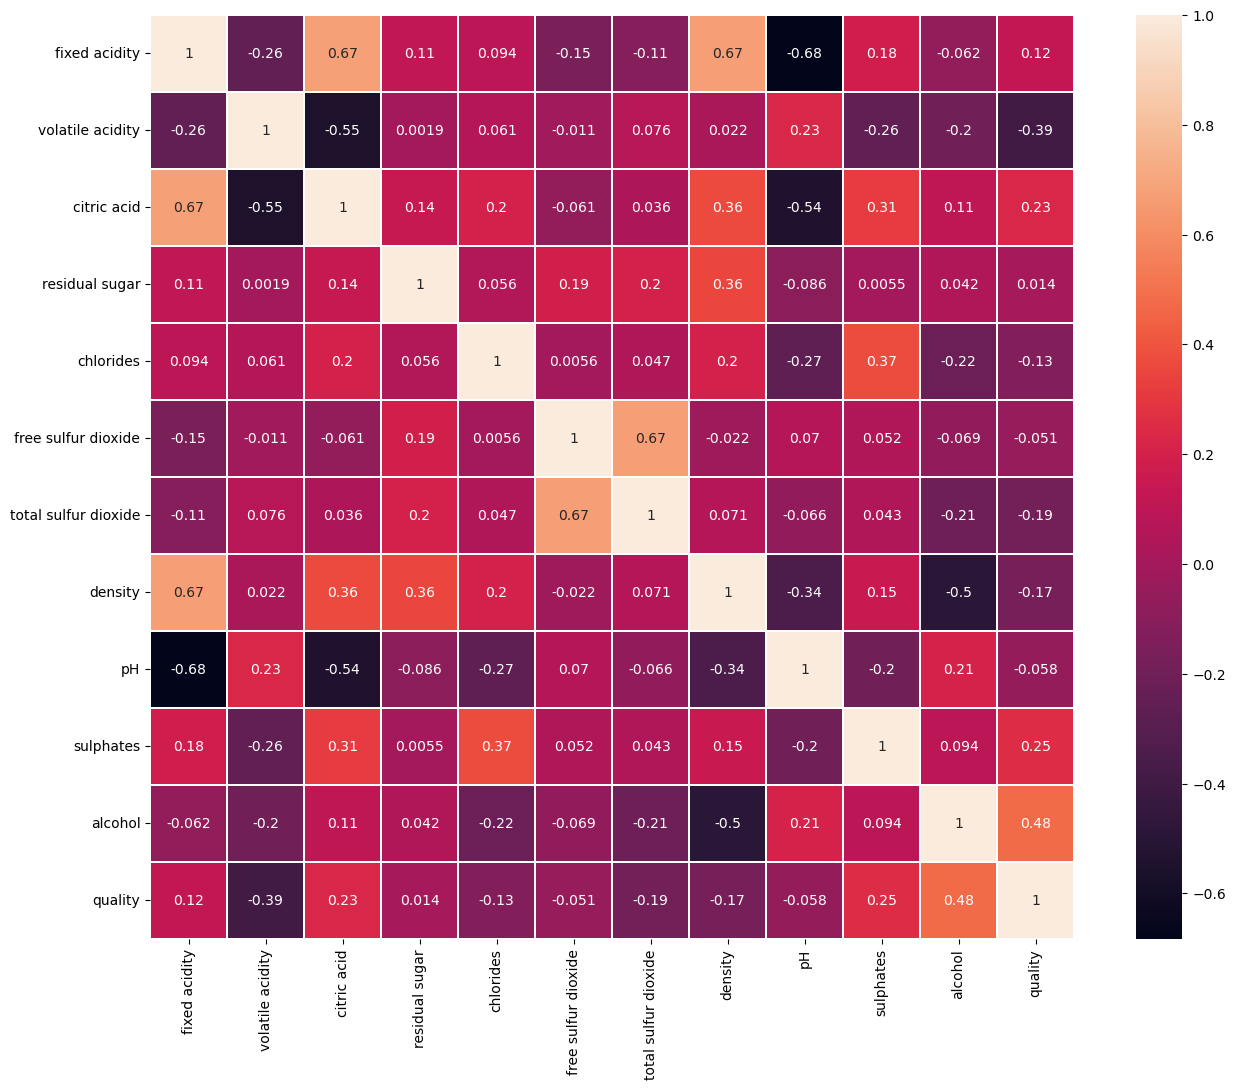

In [6]:
plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), linewidths=0.25, square=True, linecolor='w', annot=True)

A lot of columns are highly correlated. For example, pH with fixed acidity, citric acid; free sulfur dioxide with total sulfure dioxide

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
from sklearn.decomposition import PCA


In [18]:
pca_model = PCA(n_components=3)
pca_model.fit(df_scaled)


PCA(n_components=3)

The new coordination system has kept about 45% of variance (information)

In [19]:
pca_model.explained_variance_ratio_

array([0.26009731, 0.1868235 , 0.14024331])

In [12]:
new_components = pca_model.transform(df_scaled)

In [14]:
new_components.shape

(1599, 2)

Text(0, 0.5, 'PC2')

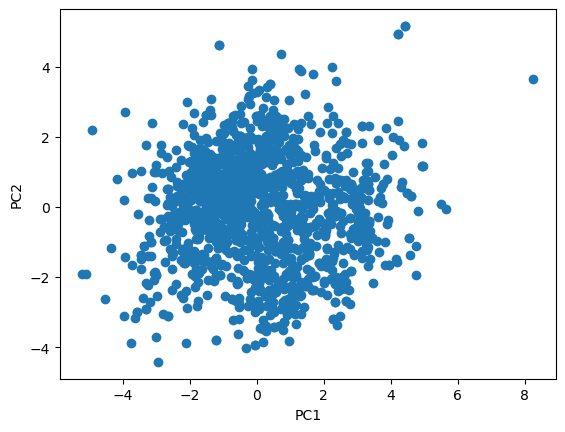

In [15]:
plt.scatter(new_components[:, 0], new_components[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [20]:
pca_feature_correlation = pd.DataFrame(pca_model.components_.transpose(),
                                       columns=['component_1', 'component_2', 'component_3'],
                                       index=df.columns)

In [21]:
pca_feature_correlation

,component_1,component_2,component_3
fixed acidity,0.487883,-0.004173,-0.164829
volatile acidity,-0.265129,0.338968,-0.227089
citric acid,0.473335,-0.137358,0.100229
residual sugar,0.139154,0.167736,0.243620
chlorides,0.197427,0.189788,-0.026608
free sulfur dioxide,-0.045881,0.259483,0.616111
total sulfur dioxide,0.004067,0.363971,0.540732
density,0.370301,0.330781,-0.168723
pH,-0.432721,-0.065440,0.069771
sulphates,0.254535,-0.109334,0.212913


pc_1 = 0.487883 * fixed_acidity - 0.265 * valotile_acidity + 0.47 * citric acid ......